# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.dates as mdates

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d400.csv')

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

C:\ProgramData\Anaconda3\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Users\asd_v\AppData\Roaming\Python\Python38\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### needed 
1. record high temperatures
2. record low temperatures 

by day of the year over the period 2005-2014. 

3. shaded The area between the record high and record low temperatures for each day should be shaded.
4. scatter of the 2015 data for any points
5. Watch out for leap days (i.e. February 29th)

Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

### explore data set 

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Date,Element,Data_Value
0,0,USW00094889,2014-11-12,TMAX,22
1,1,USC00208972,2009-04-29,TMIN,56
2,2,USC00200032,2008-05-26,TMAX,278
3,3,USC00205563,2005-11-11,TMAX,139
4,4,USC00200230,2014-02-27,TMAX,-106


In [4]:
data.dtypes

Unnamed: 0     int64
ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [5]:
#convert to date 
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Unnamed: 0             int64
ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object

In [6]:
#take all days 
data['day'] = data['Date'].dt.strftime('%m-%d')
data.head()

,Unnamed: 0,ID,Date,Element,Data_Value,day
0,0,USW00094889,2014-11-12,TMAX,22,11-12
1,1,USC00208972,2009-04-29,TMIN,56,04-29
2,2,USC00200032,2008-05-26,TMAX,278,05-26
3,3,USC00205563,2005-11-11,TMAX,139,11-11
4,4,USC00200230,2014-02-27,TMAX,-106,02-27


In [7]:
#remove 29-02
data = data[data['day']!='02-29']

In [8]:
#from tenth of C to C 
data['Data_Value'] = data['Data_Value']*0.1

In [9]:
#take all years 
data['Year'] = data['Date'].dt.year

In [10]:
#subbset from 2005 to 2015 
data_2005to2015 =  data[(data.Year >= 2005) & (data.Year < 2015) ]
#subbset 2015 
data_2015 =  data[(data.Year == 2015)]

In [11]:
#max temp for each day 
max_temp = data_2005to2015[(data_2005to2015['Element'] == 'TMAX')].groupby(['day'])['Data_Value'].max()
max_temp.head()

day
01-01    15.6
01-02    13.9
01-03    13.3
01-04    10.6
01-05    12.8
Name: Data_Value, dtype: float64

In [12]:
#min temp for each day
min_temp = data_2005to2015[(data_2005to2015['Element'] == 'TMIN')].groupby(['day'])['Data_Value'].min()
min_temp.head()

day
01-01   -16.0
01-02   -26.7
01-03   -26.7
01-04   -26.1
01-05   -15.0
Name: Data_Value, dtype: float64

In [13]:
#merge with 2015 to compare 
data = data.merge(max_temp.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='day', how='left')
data = data.merge(min_temp.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='day', how='left')

In [14]:
#take the breaks from 2015 
break_high = data[(data.Year==2015)&(data.Data_Value > data.Max_temp)]
break_low = data[(data.Year==2015)&(data.Data_Value < data.Min_temp)]
break_high

,Unnamed: 0,ID,Date,Element,Data_Value,day,Year,Max_temp,Min_temp
507,507,USC00200228,2015-12-13,TMAX,16.7,12-13,2015,11.1,-17.8
669,669,USC00201250,2015-12-23,TMAX,16.7,12-23,2015,13.3,-20.0
2199,2199,USW00014833,2015-12-13,TMIN,13.9,12-13,2015,11.1,-17.8
2266,2266,USW00014833,2015-12-13,TMAX,16.1,12-13,2015,11.1,-17.8
4382,4382,USC00202308,2015-12-13,TMAX,17.8,12-13,2015,11.1,-17.8
...,...,...,...,...,...,...,...,...,...
161031,161113,USC00200230,2015-09-16,TMAX,28.3,09-16,2015,27.8,-1.0
161098,161180,USC00201250,2015-12-08,TMAX,8.3,12-08,2015,7.2,-20.0
161193,161275,USC00205050,2015-12-08,TMAX,9.4,12-08,2015,7.2,-20.0
161897,161979,USW00004848,2015-09-16,TMAX,28.3,09-16,2015,27.8,-1.0


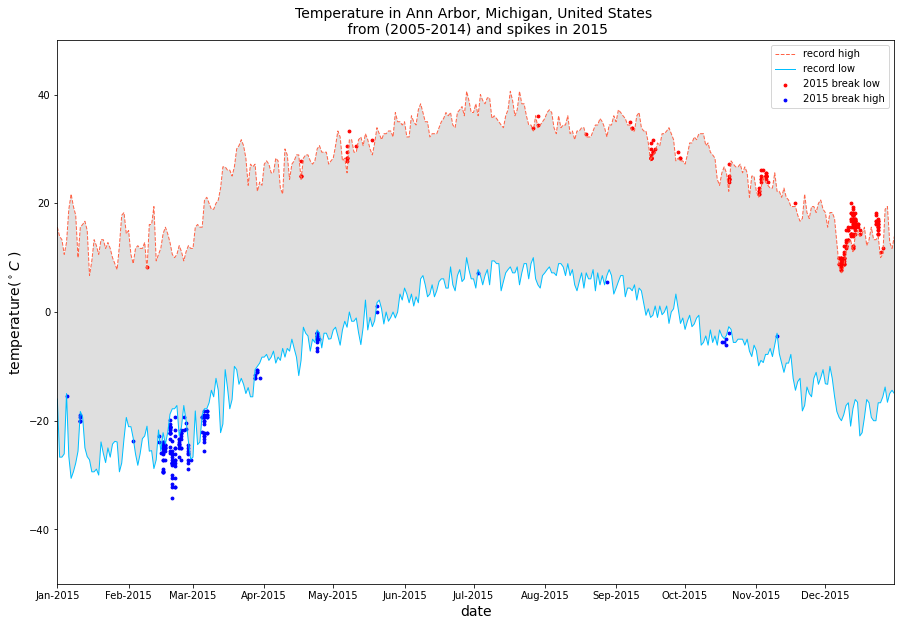

In [19]:

#create dates 
date= np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

#plot
plt.figure(figsize=(15,10)) #size 

#max timp line
plt.plot(date, max_temp, '--k', label="record high" , color = "tomato", linewidth=1)
#min temp line
plt.plot(date , min_temp, '-k',label="record low", color = "deepskyblue", linewidth=1) 
#fill
plt.gca().fill_between(date,min_temp, max_temp, facecolor='grey',alpha=0.25) 

#spikes in 2015 
plt.scatter(break_high.Date.values, break_high.Data_Value.values, color='red', s=8 ,label='2015 break low')
plt.scatter(break_low.Date.values, break_low.Data_Value.values, color='blue', s=8  ,label='2015 break high')

#limits 
ax = plt.gca() 
ax.set_ylim([-50,50])
ax.set_xlim(['2015-01-01','2015-12-31'])

#set ticktis for more clear about the day 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

#set labels for the data 
plt.xlabel('date',size=14) 
plt.ylabel('temperature($^\circ C$ )',size=14)
plt.title('Temperature in Ann Arbor, Michigan, United States \n from (2005-2014) and spikes in 2015',size=14) 

plt.legend(loc=0) 
plt.savefig('Plotting Weather Patterns.png')